In [1]:
%load_ext autoreload
%autoreload 2
%load_ext watermark
%watermark -a "Kenneth Brezinski" -v

Author: Kenneth Brezinski

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.22.0



In [71]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%watermark --iversions

numpy     : 1.19.2
matplotlib: 3.3.3
pandas    : 1.4.1



In [77]:
df = pd.read_csv('data/mobility.csv')

In [101]:
is_CA = df['location_key'].apply(lambda x: x.startswith('CA_QC') if isinstance(x, str) else False)
df_CA = df[is_CA]
#df_CA = df_CA.drop(['date', 'location_key'], axis=1)
print(df_CA.columns)

Index(['date', 'location_key', 'mobility_retail_and_recreation',
       'mobility_grocery_and_pharmacy', 'mobility_parks',
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential'],
      dtype='object')


<AxesSubplot:>

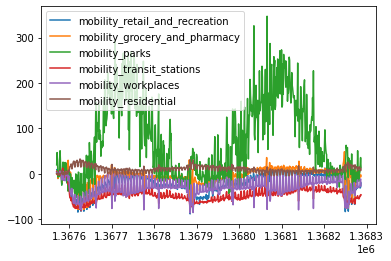

In [102]:
df_CA.plot()

In [103]:
df_CA

,date,location_key,mobility_retail_and_recreation,mobility_grocery_and_pharmacy,mobility_parks,mobility_transit_stations,mobility_workplaces,mobility_residential
1367571,2020-02-15,CA_QC,4.0,0.0,20.0,5.0,2.0,1.0
1367572,2020-02-16,CA_QC,10.0,7.0,47.0,2.0,4.0,-1.0
1367573,2020-02-17,CA_QC,3.0,1.0,29.0,-1.0,0.0,0.0
1367574,2020-02-18,CA_QC,-10.0,-10.0,-7.0,-2.0,1.0,2.0
1367575,2020-02-19,CA_QC,-3.0,-4.0,-3.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...
1368283,2022-01-27,CA_QC,-27.0,1.0,0.0,-53.0,-29.0,14.0
1368284,2022-01-28,CA_QC,-29.0,-2.0,3.0,-50.0,-28.0,15.0
1368285,2022-01-29,CA_QC,-31.0,-3.0,20.0,-47.0,-14.0,10.0
1368286,2022-01-30,CA_QC,-29.0,-7.0,36.0,-48.0,-11.0,7.0


In [108]:
tmp.columns

Index(['date', 'location_key', 'mobility_retail_and_recreation',
       'mobility_grocery_and_pharmacy', 'mobility_parks',
       'mobility_transit_stations', 'mobility_workplaces',
       'mobility_residential'],
      dtype='object')

In [116]:
# sanity check to check which columns have missing elements

is_CA = df['location_key'].apply(lambda x: x.startswith('CA') if isinstance(x, str) else False)
df_CA = df[is_CA]

# loop through provinces
for province in df_CA['location_key'].unique():
    
    # fetch provincial data
    tmp = df_CA[df_CA['location_key'] == province]
    
    # loop through mobility metrics
    for metric in tmp.columns:
        # check if column has missing data
        if tmp[metric].isnull().sum() == 0:   
            continue
        # print missing occurances
        print(f"{province}:{metric}: {tmp[metric].isnull().sum()} missing")   

CA_MB:mobility_parks: 26 missing
CA_NB:mobility_parks: 76 missing
CA_NB:mobility_transit_stations: 28 missing
CA_NL:mobility_retail_and_recreation: 3 missing
CA_NL:mobility_grocery_and_pharmacy: 20 missing
CA_NL:mobility_parks: 113 missing
CA_NL:mobility_transit_stations: 105 missing
CA_NL:mobility_workplaces: 3 missing
CA_NS:mobility_parks: 60 missing
CA_NS:mobility_transit_stations: 3 missing
CA_NT:mobility_retail_and_recreation: 70 missing
CA_NT:mobility_grocery_and_pharmacy: 591 missing
CA_NT:mobility_parks: 692 missing
CA_NT:mobility_transit_stations: 120 missing
CA_NT:mobility_workplaces: 6 missing
CA_NT:mobility_residential: 692 missing
CA_NU:mobility_retail_and_recreation: 544 missing
CA_NU:mobility_grocery_and_pharmacy: 575 missing
CA_NU:mobility_parks: 575 missing
CA_NU:mobility_transit_stations: 575 missing
CA_NU:mobility_workplaces: 6 missing
CA_NU:mobility_residential: 575 missing
CA_PE:mobility_retail_and_recreation: 20 missing
CA_PE:mobility_grocery_and_pharmacy: 20 miss

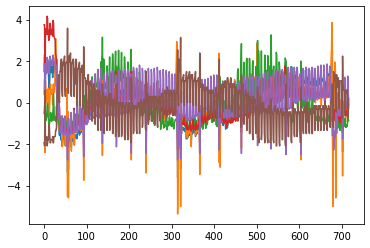

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

## performs quite well; better to just stick to StandardScalar
X = df_CA[df_CA['location_key'] == 'CA_ON'].iloc[:, 2:]

pipe = Pipeline([('scaler', StandardScaler()),
                 ('knn', KNNImputer(n_neighbors=5, weights="distance"))])
trans = pipe.fit_transform(X)

plt.plot(trans)